# Computer Price Prediction

## Required Libraries 

In [247]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt 
import warnings 

## Importing the csv file i.e the dataset is stored as a dataframe

In [248]:
df=pd.read_csv('C:\\Users\\Kaushik\\OneDrive\\Ivy Data Science Notes\\Machine Learning Module\\Regression Datasets\\ComputerPricesData.csv')

In [249]:
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads
0,1499,25,80,4,14,no,no,yes,94
1,1795,33,85,2,14,no,no,yes,94
2,1595,25,170,4,15,no,no,yes,94
3,1849,25,170,8,14,no,no,no,94
4,3295,33,340,16,14,no,no,yes,94


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 440.2+ KB


In [251]:
df.dtypes

price       int64
speed       int64
hd          int64
ram         int64
screen      int64
cd         object
multi      object
premium    object
ads         int64
dtype: object

In [252]:
df.shape

(6259, 9)

In [253]:
df.describe()

,price,speed,hd,ram,screen,ads
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 440.2+ KB


## Checking for NULL Values 

In [255]:
df.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
dtype: int64

## Checking datatypes

In [256]:
df.dtypes

price       int64
speed       int64
hd          int64
ram         int64
screen      int64
cd         object
multi      object
premium    object
ads         int64
dtype: object

Since all data types are float there is no need to do categorical handling 

## Outlier Detection
We can detect outliers by plotting histograms

array([[<AxesSubplot:title={'center':'speed'}>,
        <AxesSubplot:title={'center':'hd'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

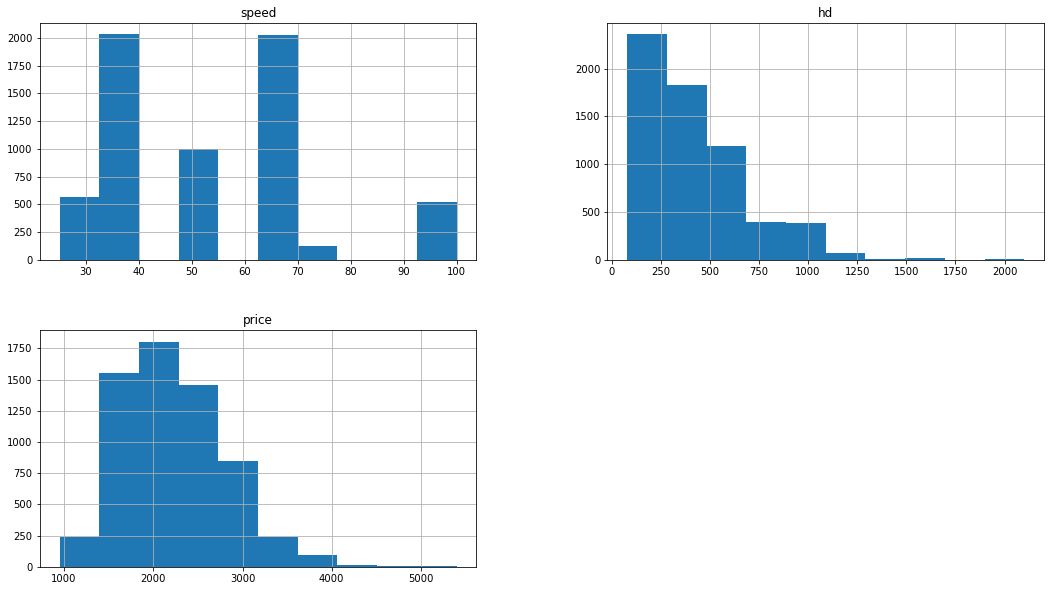

In [257]:
df.hist(['speed','hd','price'], figsize=(18,10))

# Doing the staistical tests for identifying predictors

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

In [259]:
df.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads'],
      dtype='object')

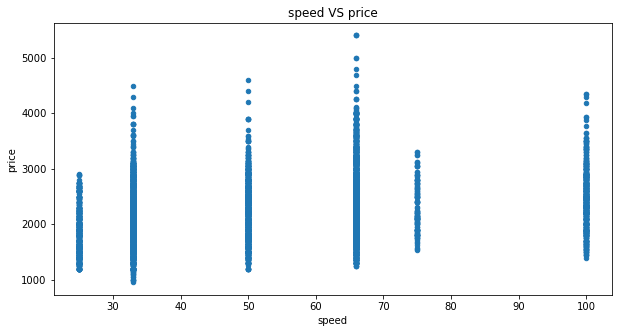

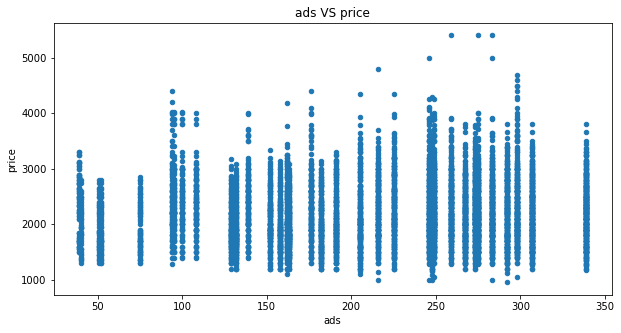

In [258]:
ContinuousCols=['speed', 'ads']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

## Correlation test

As all the variables are continuous, doing the correlation test to find the best predictors is enough. ANOVA test and chi square tests are not applicable for the present dataset

In [260]:
df.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads'],
      dtype='object')

In [261]:
# Calculating correlation matrix
ContinuousCols=['price','ads','speed']

# Creating the correlation matrix
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,price,ads,speed
price,1.000000,0.054540,0.300976
ads,0.054540,1.000000,-0.215232
speed,0.300976,-0.215232,1.000000


In [262]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['price'][abs(CorrelationData['price']) > 0.5 ]

price    1.0
Name: price, dtype: float64

As no column is selected the threshold is reduced to 0.3

In [263]:
# Filtering only those columns where absolute correlation > 0.3 with Target Variable
CorrelationData['price'][abs(CorrelationData['price']) > 0.3 ]

price    1.000000
speed    0.300976
Name: price, dtype: float64

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [264]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [265]:
df.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads'],
      dtype='object')

In [266]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['ram','screen','premium','multi','cd']
FunctionAnova(inpData=df, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

ram is correlated with price | P-Value: 0.0
screen is correlated with price | P-Value: 1.7979337838597882e-132
premium is correlated with price | P-Value: 1.6228830638522487e-10
multi is NOT correlated with price | P-Value: 0.1877771427064562
cd is correlated with price | P-Value: 5.439449136508735e-56


['ram', 'screen', 'premium', 'cd']

Hence we can select the columns where absolute correlation > 0.3 with Target Variable


### Best predictors are 
- ram
- screen
- premium
- cd
- speed

In [267]:
df.dtypes

price       int64
speed       int64
hd          int64
ram         int64
screen      int64
cd         object
multi      object
premium    object
ads         int64
dtype: object

In [268]:
df.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads'],
      dtype='object')

In [269]:
SelectColumns=['ram','screen','premium','cd','speed','price']
DataForML=df[SelectColumns]
DataForML.head()

,ram,screen,premium,cd,speed,price
0,4,14,yes,no,25,1499
1,2,14,yes,no,33,1795
2,4,15,yes,no,25,1595
3,8,14,no,no,25,1849
4,16,14,yes,no,33,3295


## Renaming the columns

In [270]:
DataForML['premium']=DataForML['premium'].replace({'yes':1,'no':0})
DataForML['cd']=df['cd'].replace({'yes':1,'no':0})


In [271]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Machine Learning: Splitting the data into Training and Testing sample
70% of data is used as Training data and the rest 30% is used as Tesing data.

In [272]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['ram','screen','premium','cd','speed']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [273]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [274]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4381, 5)
(4381,)
(1878, 5)
(1878,)


In [25]:
X_train[0:4]

array([[0.21164384, 0.23291925, 0.07417582],
       [0.50913242, 0.        , 0.01648352],
       [0.49497717, 0.44409938, 0.00549451],
       [0.58675799, 0.33850932, 0.00549451]])

# Multiple Linear Regression

In [275]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.49611781507672104

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   1578          2176.0
1   2495          2371.0
2   1790          2207.0
3   2495          2107.0
4   1695          1793.0
Mean Accuracy on test data: 85.57379957173755
Median Accuracy on test data: 88.31695510062431

Accuracy values for 10-fold Cross Validation:
 [83.72635083 84.94069417 86.07092282 86.02649821 86.90645735 87.75266768
 87.9076114  86.55720426 80.2160699  64.69839637]

Final Average Accuracy of the model: 83.48


In [155]:
TestingDataResults.head()

,ram,screen,premium,cd,speed,price,Predictedprice,APE
0,0.066667,0.000000,0.0,0.0,0.000000,1578,2176.0,37.896071
1,0.200000,0.333333,1.0,1.0,1.000000,2495,2371.0,4.969940
2,0.200000,0.333333,1.0,1.0,0.546667,1790,2207.0,23.296089
3,0.200000,0.000000,1.0,1.0,0.546667,2495,2107.0,15.551102
4,0.066667,0.000000,1.0,0.0,0.106667,1695,1793.0,5.781711


# Decision Trees

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.5168093690705293

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   1578          2014.0
1   2495          2249.0
2   1790          2249.0
3   2495          2249.0
4   1695          1658.0
Mean Accuracy on test data: 86.0430752690204
Median Accuracy on test data: 88.7248322147651

Accuracy values for 10-fold Cross Validation:
 [83.34078072 85.16762648 86.86983668 87.43664777 87.91581289 86.71903994
 86.42071266 85.22493193 80.61387471 71.82830885]

Final Average Accuracy of the model: 84.15


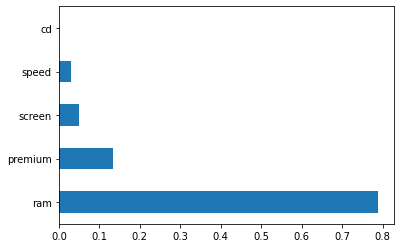

In [276]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Random Forest

RandomForestRegressor(max_depth=3)
R2 Value: 0.5265523484503436

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   1578          2028.0
1   2495          2249.0
2   1790          2249.0
3   2495          2249.0
4   1695          1690.0
Mean Accuracy on test data: 86.12467242615631
Median Accuracy on test data: 88.49529780564264

Accuracy values for 10-fold Cross Validation:
 [83.40229073 85.5868004  86.79357323 87.12594099 88.34923124 87.34978015
 86.48403771 85.3334881  80.79451989 72.46429024]

Final Average Accuracy of the model: 84.37


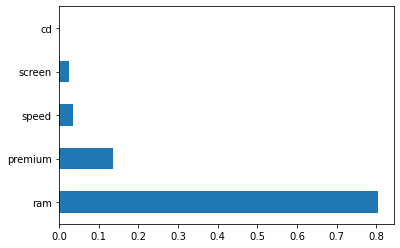

In [277]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=3, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[11:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.6408091463158245

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   1578          1580.0
1   2495          2299.0
2   1790   

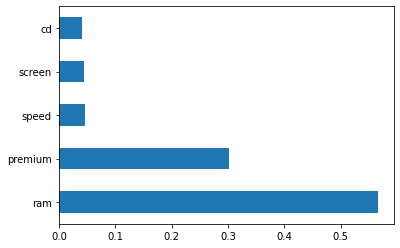

In [278]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## KNN

In [279]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.5457158048020057

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   1578          1511.0
1   2495          2164.0
2   1790          2399.0
3   2495          2018.0
4   1695          1478.0
Mean Accuracy on test data: 85.9212783520072
Median Accuracy on test data: 89.37809122549918

Accuracy values for 10-fold Cross Validation:
 [86.65635069 87.77029957 88.44632247 88.45318687 88.29655136 86.90509161
 82.92738458 79.67545331 71.74492458 62.30337291]

Final Average Accuracy of the model: 82.32


# Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them. 

<b>XG Boost is chosen due to it's accuracy</b>

In order to deploy the model we follow below steps
1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

## Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'Age', 'KM',and 'Weight'.

As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [280]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['ram', 'screen', 'premium','cd','speed']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(6259, 5)
(6259,)


#### Cross validating the final model accuracy with less predictors

In [281]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:squarederror', 
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [85.55493486 87.62473795 89.06211507 89.34985518 89.82783011 88.47585703
 88.02305995 86.52162847 82.17847671 72.08361426]

Final Average Accuracy of the model: 85.87


In [282]:
import warnings
warnings.filterwarnings('ignore')

#### Step 1. Retraining the model using 100% data

In [283]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

#### Step 2. Save the model as a serialized file which can be stored anywhere

In [284]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Kaushik\OneDrive\Ivy Data Science Notes\Python Programs\Python CW


#### Step 3. Create a python function

In [287]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    

    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['ram','screen','premium','cd','speed']
    
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # GenPrice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [242]:
df.head(25)

,price,speed,hd,ram,screen,cd,multi,premium,ads
0,1499,25,80,4,14,no,no,yes,94
1,1795,33,85,2,14,no,no,yes,94
2,1595,25,170,4,15,no,no,yes,94
3,1849,25,170,8,14,no,no,no,94
4,3295,33,340,16,14,no,no,yes,94
5,3695,66,340,16,14,no,no,yes,94
6,1720,25,170,4,14,yes,no,yes,94
7,1995,50,85,2,14,no,no,yes,94
8,2225,50,210,8,14,no,no,yes,94
9,2575,50,210,4,15,no,no,yes,94


In [291]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
data=[[2,14,1,0,34],
     [2,14,1,0,45],
     [2,17,1,0,45]],
columns=['ram','screen','premium','cd','speed'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   ram  screen  premium  cd  speed
0    2      14        1   0     34
1    2      14        1   0     45
2    2      17        1   0     45


,Prediction
0,1570.0
1,1820.0
2,2082.0
